In [115]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#renders interactive plots within the notebook
%matplotlib notebook 
#preparing the final dataset by processing and merging CO2 and sea level datasets
co2_data_df = pd.read_csv("CO2Data.csv")
co2_data_df.dropna(axis = 0, how = "any", inplace = True)
sea_levels_df = pd.read_csv("SeaLevels.csv")
sea_levels_df.dropna(axis = 0, how = "any", inplace = True)
years, months = [], []
for x in range(sea_levels_df.shape[0]):
    year, month = sea_levels_df.at[x, "Time"][:-3].split("-")
    years.append(year)
    months.append(month)
sea_levels_df["Year"] = years
sea_levels_df["Month"] = months
sea_levels_df["Year"] = sea_levels_df["Year"].astype(int)
sea_levels_df["Month"] = sea_levels_df["Month"].astype(int)
df = pd.merge(co2_data_df, sea_levels_df)
#setting the input as decimal date and output as CO2 level
# this is the first relationship to be modelled
X = df["Decimal Date"]
y = df["Seasonally Adjusted CO2 (ppm)"]
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

<IPython.core.display.Javascript object>


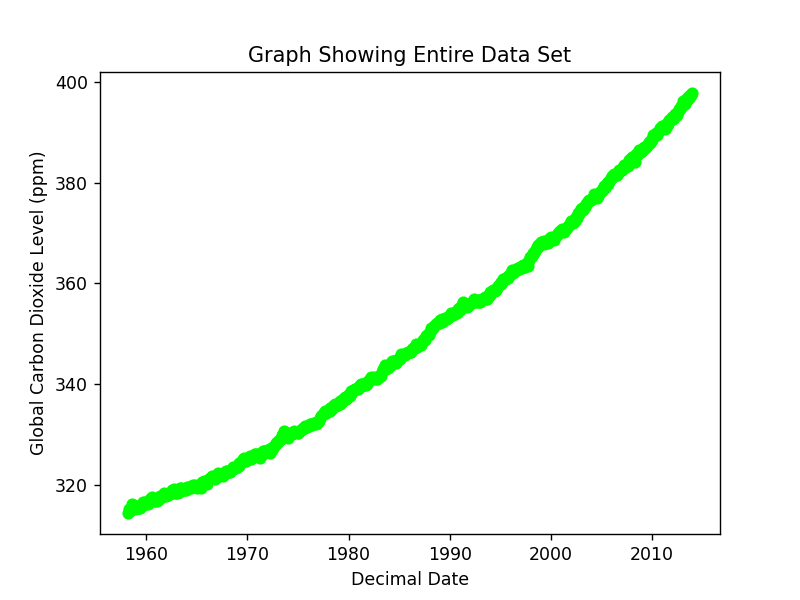

In [116]:
#graph using entire dataset to model CO2 vs Decimal Date
plt.figure()
plt.scatter(X, y, color = "lime")
plt.title("Graph Showing Entire Data Set")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.show()

<IPython.core.display.Javascript object>


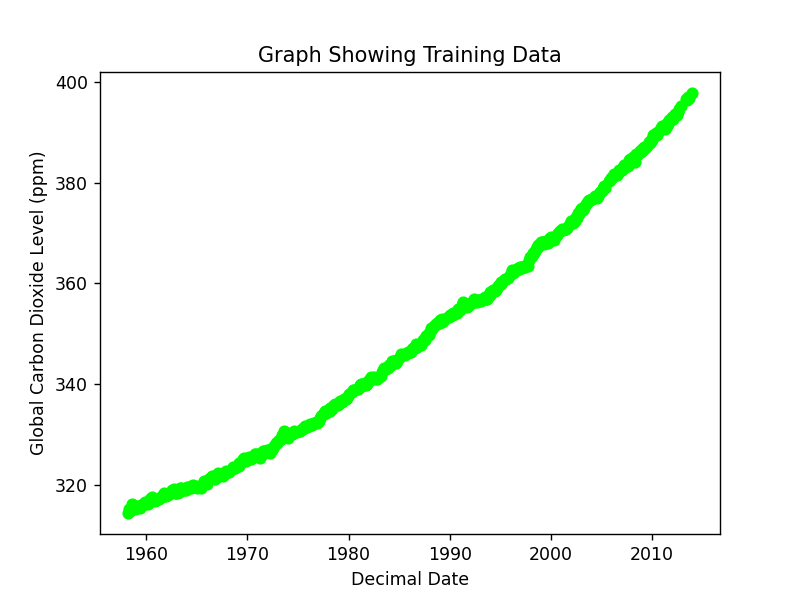

In [117]:
#graph using training data to model CO2 vs Decimal Date
plt.figure()
plt.scatter(X_train, y_train, color = "lime")
plt.title("Graph Showing Training Data")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.show()

<IPython.core.display.Javascript object>


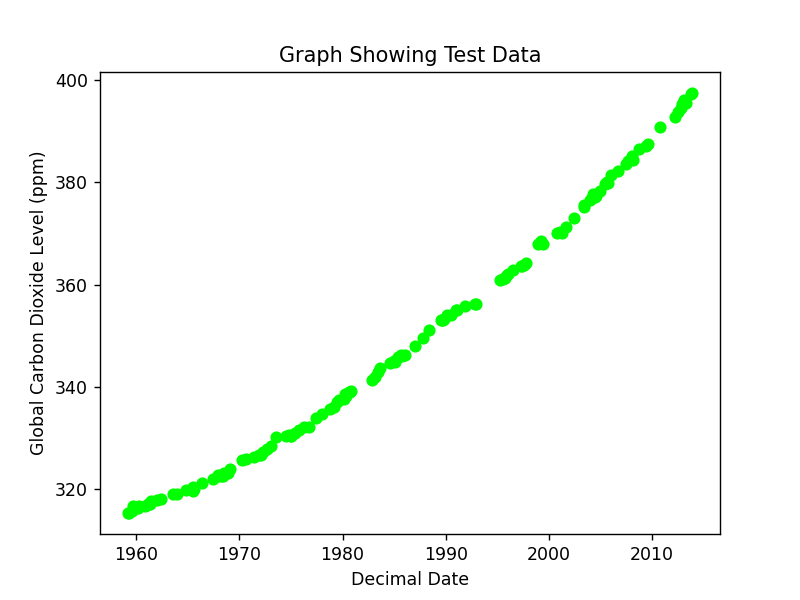

In [118]:
#graph using test data to model CO2 vs Decimal Date
plt.figure()
plt.scatter(X_test, y_test, color = "lime")
plt.title("Graph Showing Test Data")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.show()

<IPython.core.display.Javascript object>


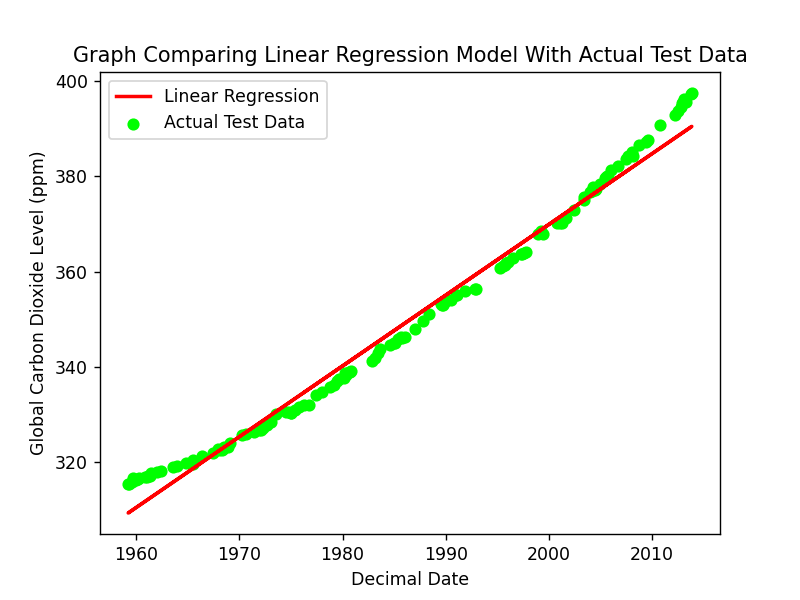

The r2 score for the Linear Regression model is 0.9848111861545816
The mean absolute error for the Linear Regression model is 2.526596753381679
The mean squared error for the Linear Regression model is 9.414280998194045


In [119]:
#training a linear regression model and predicting on the test data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
lr_predictions = lr.predict(X_test.values.reshape(-1, 1))
#graph with model predictions versus actual test data
plt.figure()
plt.plot(X_test, lr_predictions, label = "Linear Regression", color = "r", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Linear Regression Model With Actual Test Data")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.legend()
plt.show()
#evaluating the model with sklearn metrics
lr_r2 = r2_score(lr_predictions, y_test)
lr_mae = mean_absolute_error(lr_predictions, y_test)
lr_mse = mean_squared_error(lr_predictions, y_test)
print(f"The r2 score for the Linear Regression model is {lr_r2}")
print(f"The mean absolute error for the Linear Regression model is {lr_mae}")
print(f"The mean squared error for the Linear Regression model is {lr_mse}")

<IPython.core.display.Javascript object>


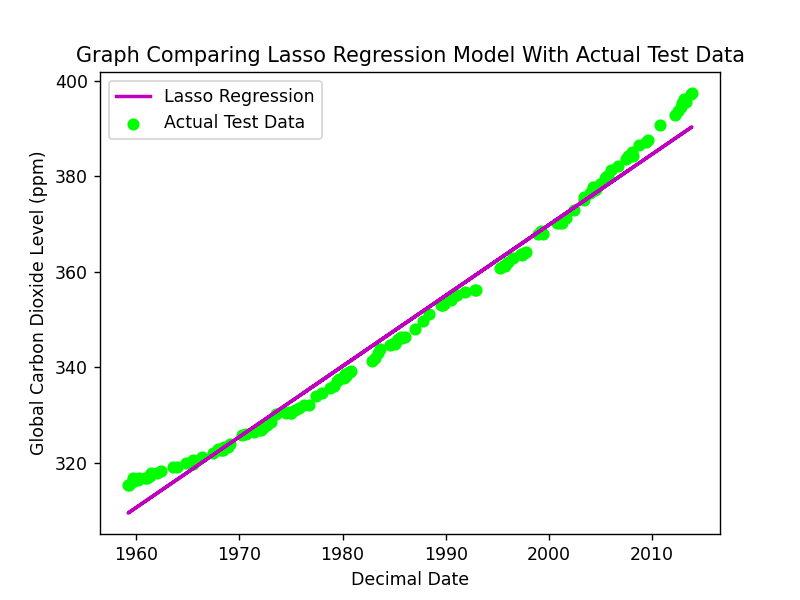

The r2 score for the Lasso Regression model is 0.9846748045221585
The mean absolute error for the Lasso Regression model is 2.5330664414269415
The mean squared error for the Lasso Regression model is 9.44790736423451


In [120]:
#training a lasso regression model and predicting on the test data
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
lasso_predictions = lasso.predict(X_test.values.reshape(-1, 1))
#graph with model predictions versus actual test data
plt.figure()
plt.plot(X_test, lasso_predictions, label = "Lasso Regression", color = "m", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Lasso Regression Model With Actual Test Data")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.legend()
plt.show()
#evaluating the model with sklearn metrics
lasso_r2 = r2_score(lasso_predictions, y_test)
lasso_mae = mean_absolute_error(lasso_predictions, y_test)
lasso_mse = mean_squared_error(lasso_predictions, y_test)
print(f"The r2 score for the Lasso Regression model is {lasso_r2}")
print(f"The mean absolute error for the Lasso Regression model is {lasso_mae}")
print(f"The mean squared error for the Lasso Regression model is {lasso_mse}")

<IPython.core.display.Javascript object>


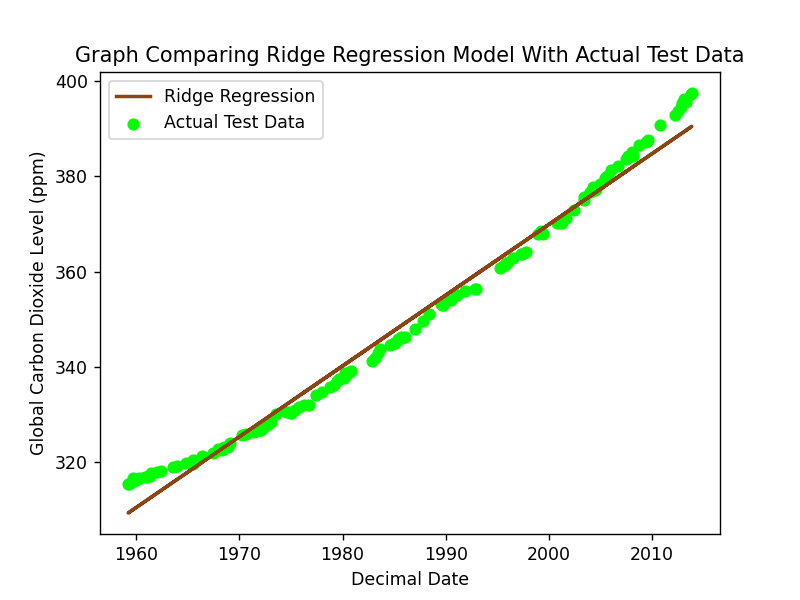

The r2 score for the Ridge Regression model is 0.9848108275589156
The mean absolute error for the Ridge Regression model is 2.5266138252472463
The mean squared error for the Ridge Regression model is 9.414362366229689


In [121]:
#training a ridge regression model and predicting on the test data
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
ridge_predictions = ridge.predict(X_test.values.reshape(-1, 1))
#graph with model predictions versus actual test data
plt.figure()
plt.plot(X_test, ridge_predictions, label = "Ridge Regression", color = "saddlebrown", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Ridge Regression Model With Actual Test Data")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.legend()
plt.show()
#evaluating the model with sklearn metrics
ridge_r2 = r2_score(ridge_predictions, y_test)
ridge_mae = mean_absolute_error(ridge_predictions, y_test)
ridge_mse = mean_squared_error(ridge_predictions, y_test)
print(f"The r2 score for the Ridge Regression model is {ridge_r2}")
print(f"The mean absolute error for the Ridge Regression model is {ridge_mae}")
print(f"The mean squared error for the Ridge Regression model is {ridge_mse}")

<IPython.core.display.Javascript object>


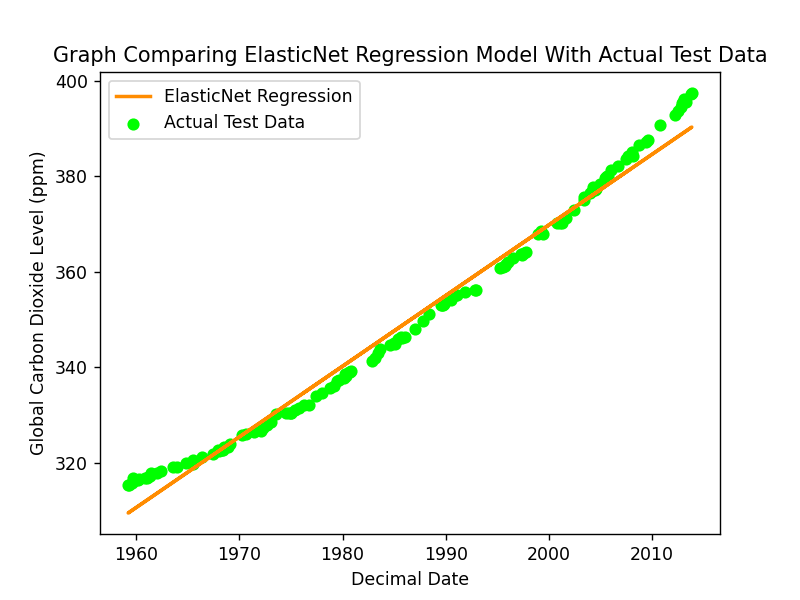

The r2 score for the ElasticNet Regression model is 0.9846398229176666
The mean absolute error for the ElasticNet Regression model is 2.534778102943102
The mean squared error for the ElasticNet Regression model is 9.45728053703336


In [122]:
#training a elasticnet regression model and predicting on the test data
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
enet_predictions = enet.predict(X_test.values.reshape(-1, 1))
#graph with model predictions versus actual test data
plt.figure()
plt.plot(X_test, enet_predictions, label = "ElasticNet Regression", color = "darkorange", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing ElasticNet Regression Model With Actual Test Data")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.legend()
plt.show()
#evaluating the model with sklearn metrics
enet_r2 = r2_score(enet_predictions, y_test)
enet_mae = mean_absolute_error(enet_predictions, y_test)
enet_mse = mean_squared_error(enet_predictions, y_test)
print(f"The r2 score for the ElasticNet Regression model is {enet_r2}")
print(f"The mean absolute error for the ElasticNet Regression model is {enet_mae}")
print(f"The mean squared error for the ElasticNet Regression model is {enet_mse}")

<IPython.core.display.Javascript object>


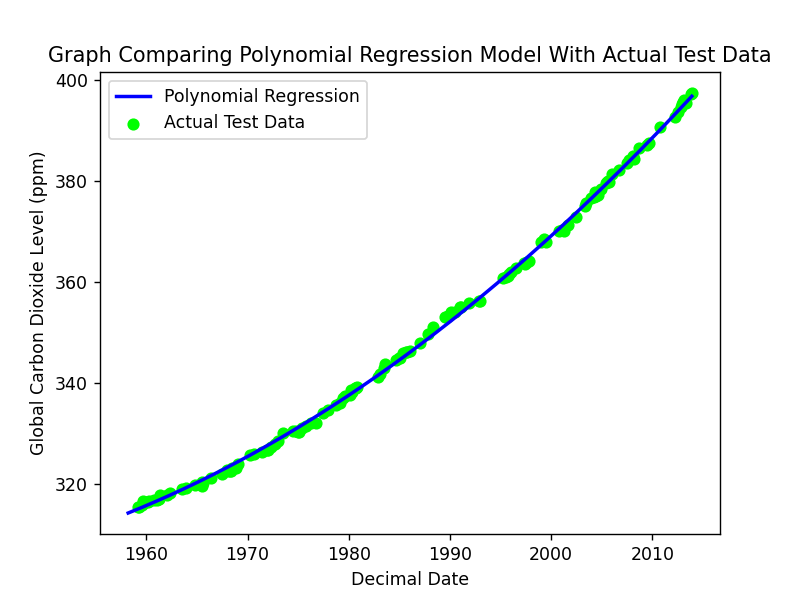

The r2 score for the Polynomial Regression model is 0.9992806301716823
The mean absolute error for the Polynomial Regression model is 0.5612538706207986
The mean squared error for the Polynomial Regression model is 0.45710007569727273


In [123]:
#training a polynomial regression model and predicting on the test data
from sklearn.preprocessing import PolynomialFeatures
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)
poly = PolynomialFeatures(degree = 2)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)
pr = LinearRegression().fit(X_train_poly, y_train)
coefficient = pr.coef_
intercept = pr.intercept_
#graph with model predictions versus actual test data
x_axis = np.arange(1958.2027, 2013.9562, 0.1)
response = intercept + x_axis * coefficient[1] + x_axis**2 * coefficient[2]
plt.figure()
plt.plot(x_axis, response, label = "Polynomial Regression", color = "b", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Polynomial Regression Model With Actual Test Data")
plt.xlabel("Decimal Date")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.legend()
plt.show()
pr_predictions = pr.predict(X_test_poly)
#evaluating the model with sklearn metrics
pr_r2 = r2_score(pr_predictions, y_test)
pr_mae = mean_absolute_error(pr_predictions, y_test)
pr_mse = mean_squared_error(pr_predictions, y_test)
print(f"The r2 score for the Polynomial Regression model is {pr_r2}")
print(f"The mean absolute error for the Polynomial Regression model is {pr_mae}")
print(f"The mean squared error for the Polynomial Regression model is {pr_mse}")

In [124]:
#creating dataframe with metrics of each model
model_evaluation = [
["Linear", lr_r2, lr_mae, lr_mse], 
["Lasso", lasso_r2, lasso_mae, lasso_mse], 
["Ridge", ridge_r2, ridge_mae, ridge_mse],
["ElasticNet", enet_r2, enet_mae, enet_mse], 
["Polynomial", pr_r2, pr_mae, pr_mse]
]
model_evaluation_df = pd.DataFrame(model_evaluation, columns = ["Regression Model", "R2 Score", "Mean Absolute Error", "Mean Squared Error"])

<IPython.core.display.Javascript object>


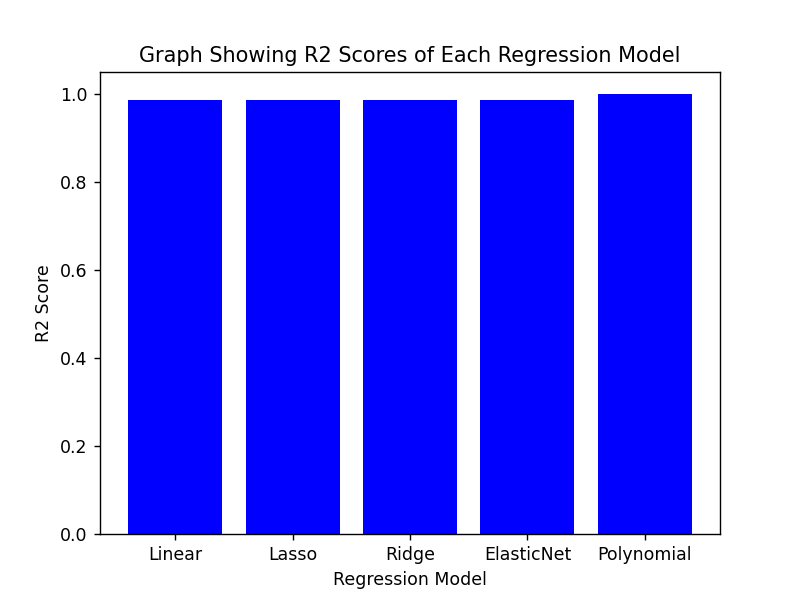

In [125]:
#creating a bar graph comparing r2 score (accuracy) of each model
plt.figure()
plt.bar("Regression Model", "R2 Score", data = model_evaluation_df, color = "b")
plt.xlabel("Regression Model")
plt.ylabel("R2 Score")
plt.title("Graph Showing R2 Scores of Each Regression Model")
plt.show()

<IPython.core.display.Javascript object>


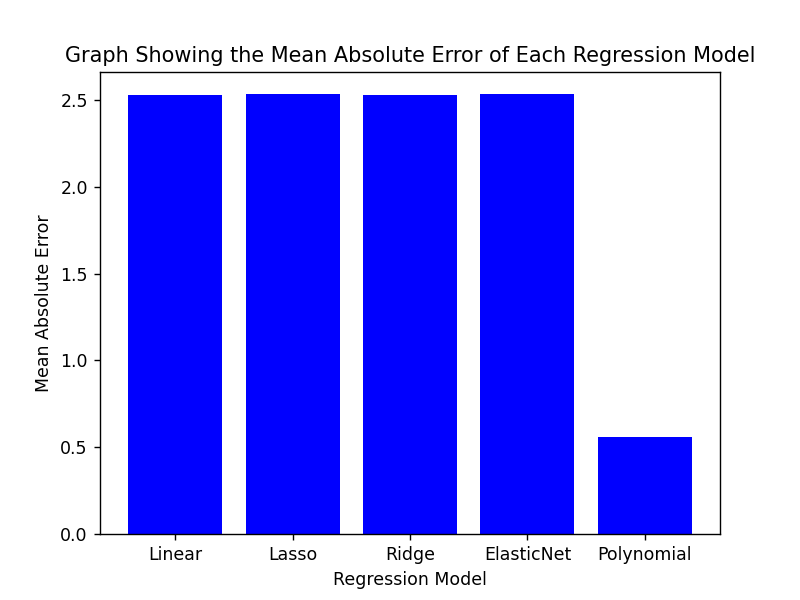

In [126]:
#creating a bar graph comparing mean absolute error of each model
plt.figure()
plt.bar("Regression Model", "Mean Absolute Error", data = model_evaluation_df, color = "b")
plt.xlabel("Regression Model")
plt.ylabel("Mean Absolute Error")
plt.title("Graph Showing the Mean Absolute Error of Each Regression Model")
plt.show()

<IPython.core.display.Javascript object>


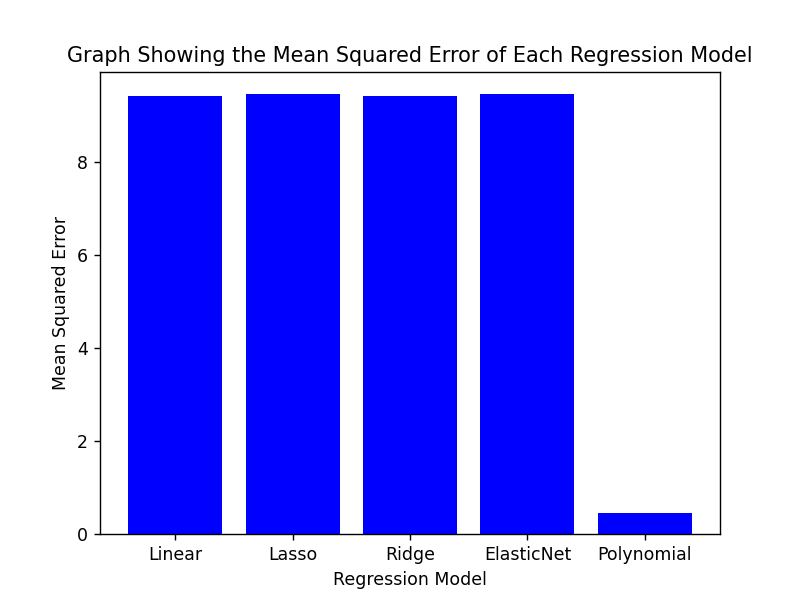

In [127]:
#creating a bar graph comparing mean squared error of each model
plt.figure()
plt.bar("Regression Model", "Mean Squared Error", data = model_evaluation_df, color = "b")
plt.xlabel("Regression Model")
plt.ylabel("Mean Squared Error")
plt.title("Graph Showing the Mean Squared Error of Each Regression Model")
plt.show()

In [128]:
#saving the coefficients and y-intercept from polynomial regression model because it has the highest accuracy with least error
import pickle
pickle.dump(coefficient, open("co2_predict_model_coefficient.pkl", "wb"))
pickle.dump(intercept, open("co2_predict_model_intercept.pkl", "wb"))

In [129]:
#setting the input as CO2 level and output as sea level
#this is the second and final relationship to be modelled and the same steps as before are repeated
X = df["Seasonally Adjusted CO2 (ppm)"]
df["Global Mean Sea Level"] = df["GMSL"]
y = df["Global Mean Sea Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<IPython.core.display.Javascript object>


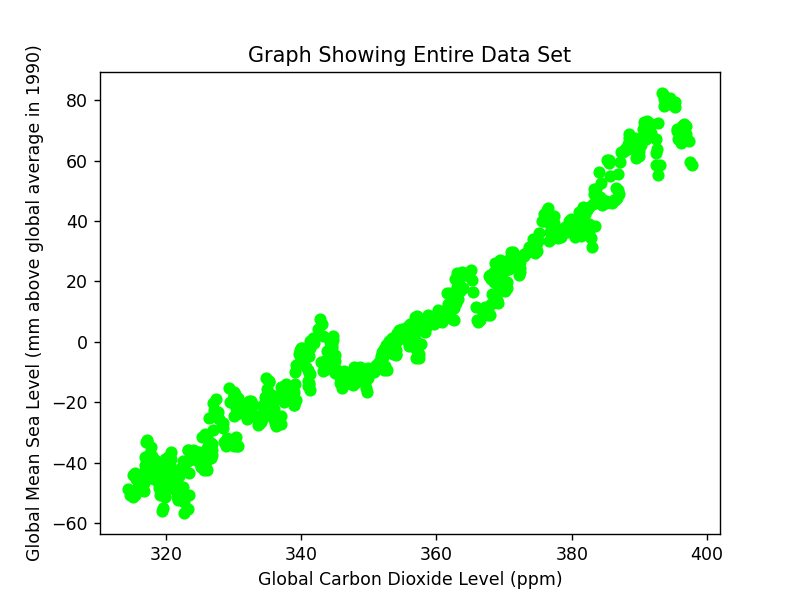

In [130]:
plt.figure()
plt.scatter(X, y, color = "lime")
plt.title("Graph Showing Entire Data Set")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.show()

<IPython.core.display.Javascript object>


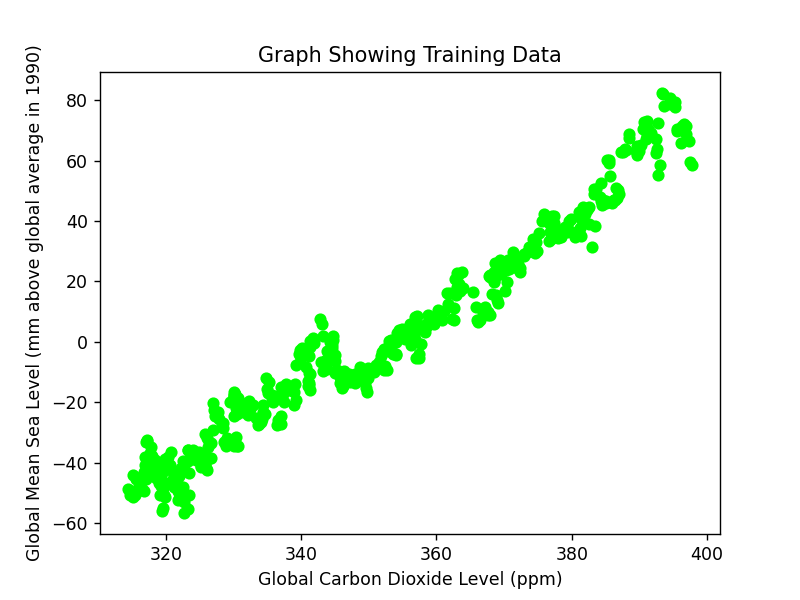

In [131]:
plt.figure()
plt.scatter(X_train, y_train, color = "lime")
plt.title("Graph Showing Training Data")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.show()

<IPython.core.display.Javascript object>


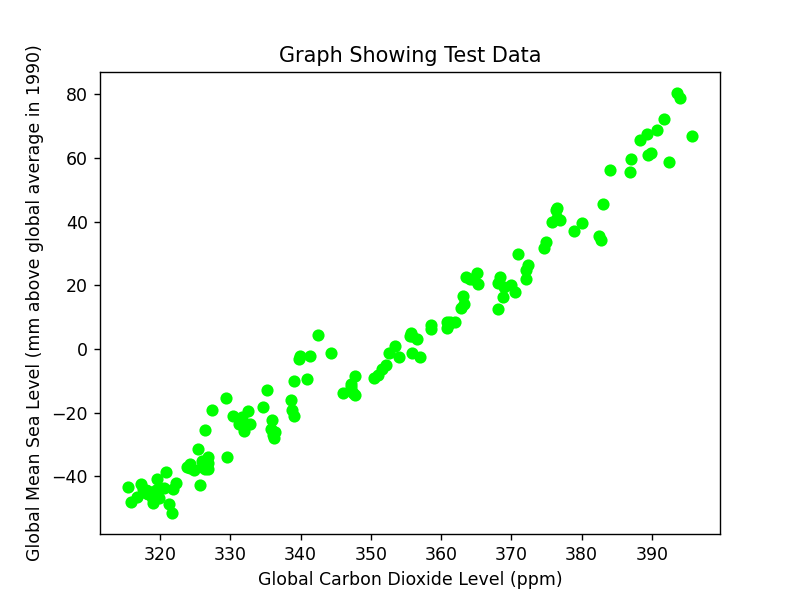

In [132]:
plt.figure()
plt.scatter(X_test, y_test, color = "lime")
plt.title("Graph Showing Test Data")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.show()

<IPython.core.display.Javascript object>


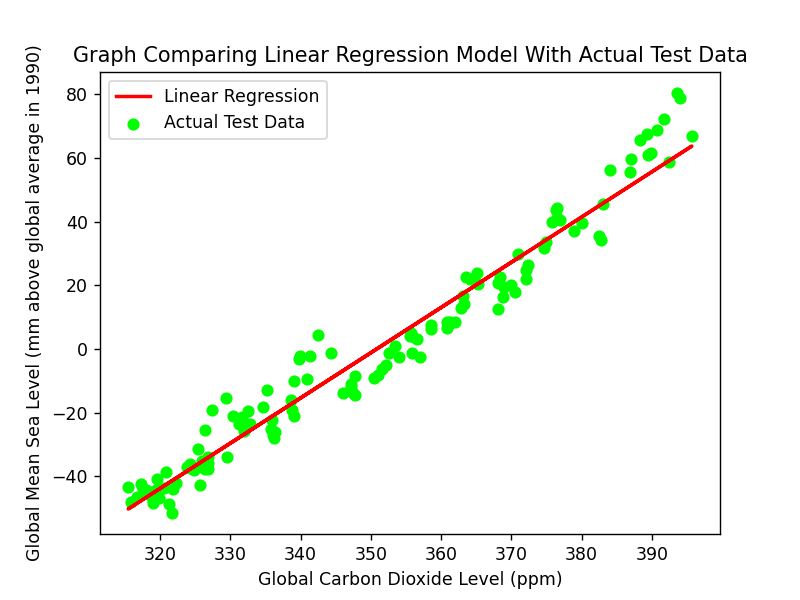

The r2 score for the Linear Regression model is 0.959559048671237
The mean absolute error for the Linear Regression model is 5.394089321718923
The mean squared error for the Linear Regression model is 45.36968827140619


In [133]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
lr_predictions = lr.predict(X_test.values.reshape(-1, 1))
plt.figure()
plt.plot(X_test, lr_predictions, label = "Linear Regression", color = "r", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Linear Regression Model With Actual Test Data")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.legend()
plt.show()
lr_r2 = r2_score(lr_predictions, y_test)
lr_mae = mean_absolute_error(lr_predictions, y_test)
lr_mse = mean_squared_error(lr_predictions, y_test)
print(f"The r2 score for the Linear Regression model is {lr_r2}")
print(f"The mean absolute error for the Linear Regression model is {lr_mae}")
print(f"The mean squared error for the Linear Regression model is {lr_mse}")

<IPython.core.display.Javascript object>


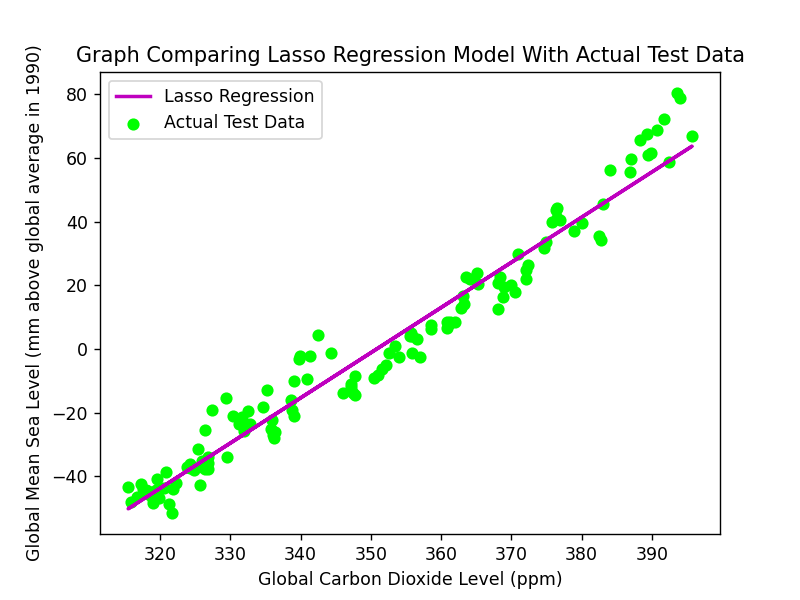

The r2 score for the Lasso Regression model is 0.9594268525879386
The mean absolute error for the Lasso Regression model is 5.391754600530181
The mean squared error for the Lasso Regression model is 45.40786344024933


In [134]:
lasso = Lasso()
lasso.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
lasso_predictions = lasso.predict(X_test.values.reshape(-1, 1))
plt.figure()
plt.plot(X_test, lasso_predictions, label = "Lasso Regression", color = "m", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Lasso Regression Model With Actual Test Data")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.legend()
plt.show()
lasso_r2 = r2_score(lasso_predictions, y_test)
lasso_mae = mean_absolute_error(lasso_predictions, y_test)
lasso_mse = mean_squared_error(lasso_predictions, y_test)
print(f"The r2 score for the Lasso Regression model is {lasso_r2}")
print(f"The mean absolute error for the Lasso Regression model is {lasso_mae}")
print(f"The mean squared error for the Lasso Regression model is {lasso_mse}")

<IPython.core.display.Javascript object>


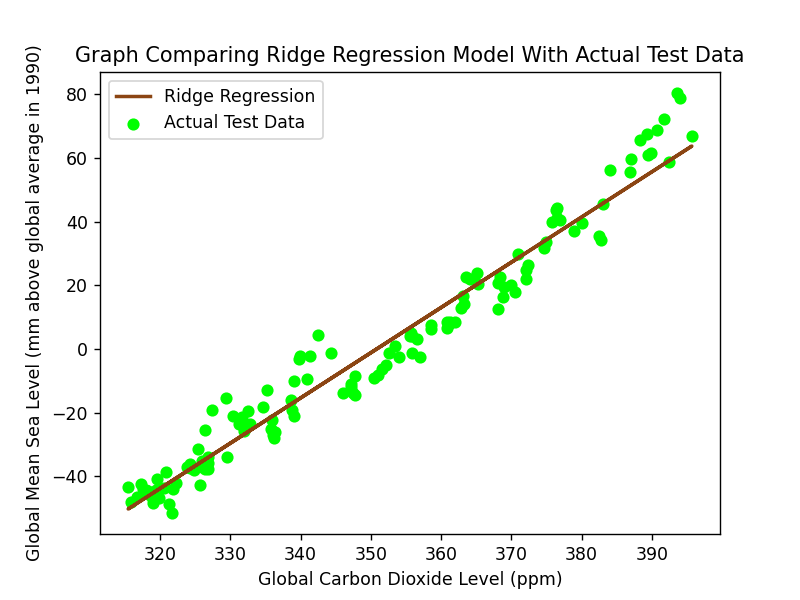

The r2 score for the Ridge Regression model is 0.9595587004871771
The mean absolute error for the Ridge Regression model is 5.3940826392283885
The mean squared error for the Ridge Regression model is 45.369785768354895


In [135]:
ridge = Ridge()
ridge.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
ridge_predictions = ridge.predict(X_test.values.reshape(-1, 1))
plt.figure()
plt.plot(X_test, ridge_predictions, label = "Ridge Regression", color = "saddlebrown", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Ridge Regression Model With Actual Test Data")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.legend()
plt.show()
ridge_r2 = r2_score(ridge_predictions, y_test)
ridge_mae = mean_absolute_error(ridge_predictions, y_test)
ridge_mse = mean_squared_error(ridge_predictions, y_test)
print(f"The r2 score for the Ridge Regression model is {ridge_r2}")
print(f"The mean absolute error for the Ridge Regression model is {ridge_mae}")
print(f"The mean squared error for the Ridge Regression model is {ridge_mse}")

<IPython.core.display.Javascript object>


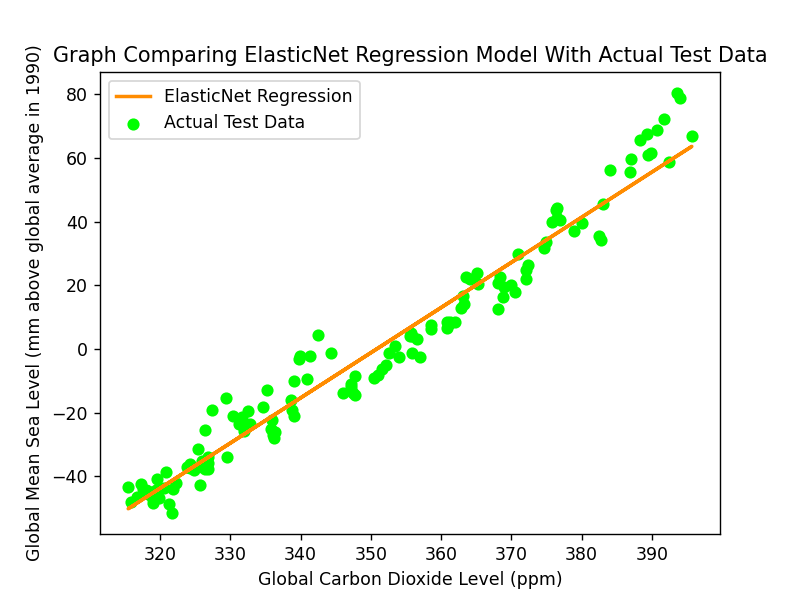

The r2 score for the ElasticNet Regression model is 0.9593988111441488
The mean absolute error for the ElasticNet Regression model is 5.391359441708592
The mean squared error for the ElasticNet Regression model is 45.41625012452633


In [136]:
enet = ElasticNet()
enet.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
enet_predictions = enet.predict(X_test.values.reshape(-1, 1))
plt.figure()
plt.plot(X_test, enet_predictions, label = "ElasticNet Regression", color = "darkorange", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing ElasticNet Regression Model With Actual Test Data")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.legend()
plt.show()
enet_r2 = r2_score(enet_predictions, y_test)
enet_mae = mean_absolute_error(enet_predictions, y_test)
enet_mse = mean_squared_error(enet_predictions, y_test)
print(f"The r2 score for the ElasticNet Regression model is {enet_r2}")
print(f"The mean absolute error for the ElasticNet Regression model is {enet_mae}")
print(f"The mean squared error for the ElasticNet Regression model is {enet_mse}")

<IPython.core.display.Javascript object>


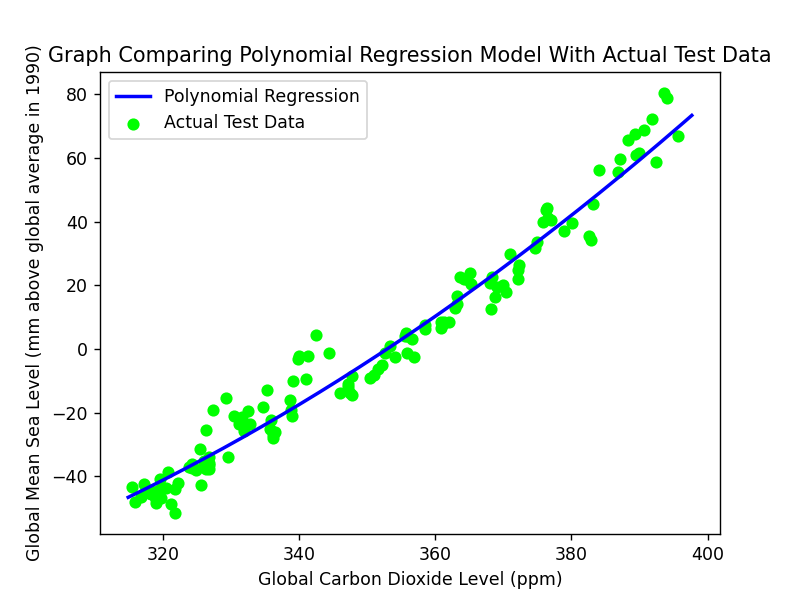

The r2 score for the Polynomial Regression model is 0.9661764258230648
The mean absolute error for the Polynomial Regression model is 4.804255587221026
The mean squared error for the Polynomial Regression model is 37.57803395839643


In [137]:
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)
poly = PolynomialFeatures(degree = 2)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)
pr = LinearRegression().fit(X_train_poly, y_train)
coefficient = pr.coef_
intercept = pr.intercept_
x_axis = np.arange(314.89, 397.76, 0.1)
response = intercept + x_axis * coefficient[1] + x_axis**2 * coefficient[2]
plt.figure()
plt.plot(x_axis, response, label = "Polynomial Regression", color = "b", linewidth = 2)
plt.scatter(X_test, y_test, label = "Actual Test Data", color = "lime")
plt.title("Graph Comparing Polynomial Regression Model With Actual Test Data")
plt.xlabel("Global Carbon Dioxide Level (ppm)")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.legend()
plt.show()
pr_predictions = pr.predict(X_test_poly)
pr_r2 = r2_score(pr_predictions, y_test)
pr_mae = mean_absolute_error(pr_predictions, y_test)
pr_mse = mean_squared_error(pr_predictions, y_test)
print(f"The r2 score for the Polynomial Regression model is {pr_r2}")
print(f"The mean absolute error for the Polynomial Regression model is {pr_mae}")
print(f"The mean squared error for the Polynomial Regression model is {pr_mse}")

In [138]:
model_evaluation = [
["Linear", lr_r2, lr_mae, lr_mse], 
["Lasso", lasso_r2, lasso_mae, lasso_mse], 
["Ridge", ridge_r2, ridge_mae, ridge_mse],
["ElasticNet", enet_r2, enet_mae, enet_mse], 
["Polynomial", pr_r2, pr_mae, pr_mse]
]
model_evaluation_df = pd.DataFrame(model_evaluation, columns = ["Regression Model", "R2 Score", "Mean Absolute Error", "Mean Squared Error"])

<IPython.core.display.Javascript object>


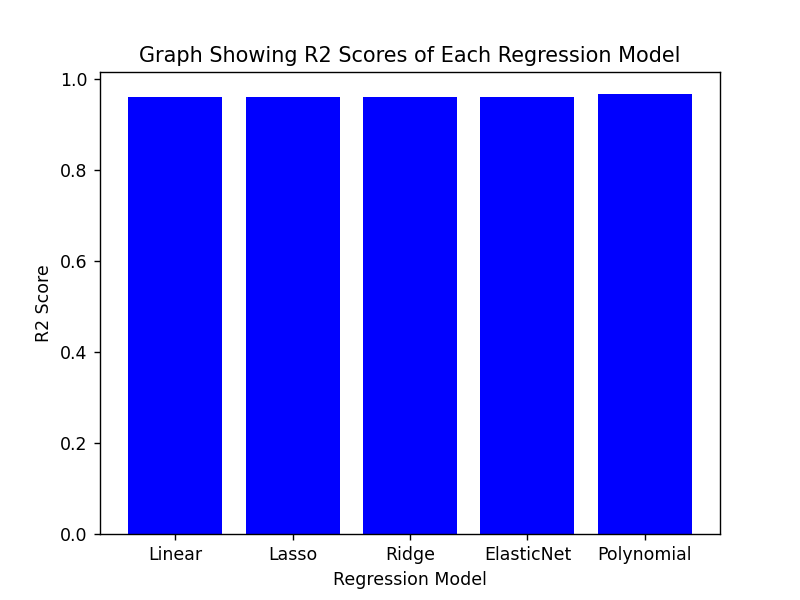

In [139]:
plt.figure()
plt.bar("Regression Model", "R2 Score", data = model_evaluation_df, color = "b")
plt.xlabel("Regression Model")
plt.ylabel("R2 Score")
plt.title("Graph Showing R2 Scores of Each Regression Model")
plt.show()

<ipython-input-140-422c3533e7bb>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


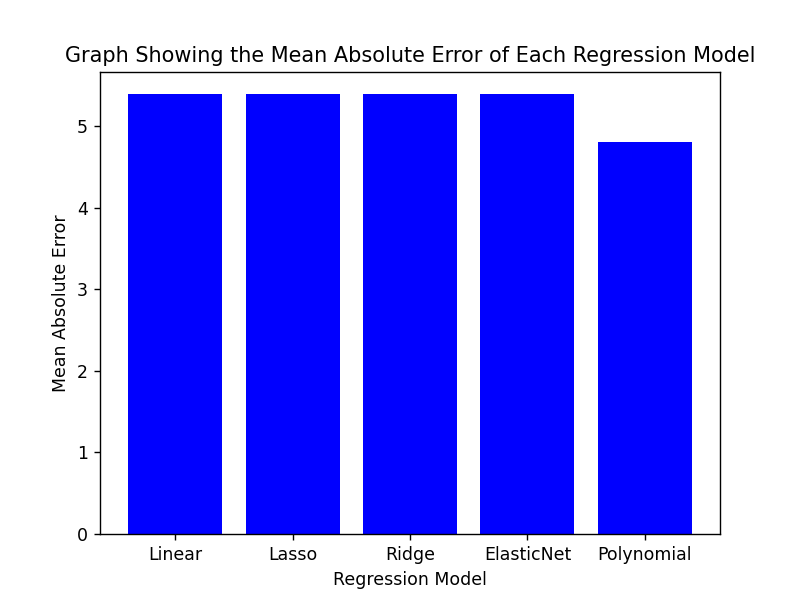

In [140]:
plt.figure()
plt.bar("Regression Model", "Mean Absolute Error", data = model_evaluation_df, color = "b")
plt.xlabel("Regression Model")
plt.ylabel("Mean Absolute Error")
plt.title("Graph Showing the Mean Absolute Error of Each Regression Model")
plt.show()

<IPython.core.display.Javascript object>


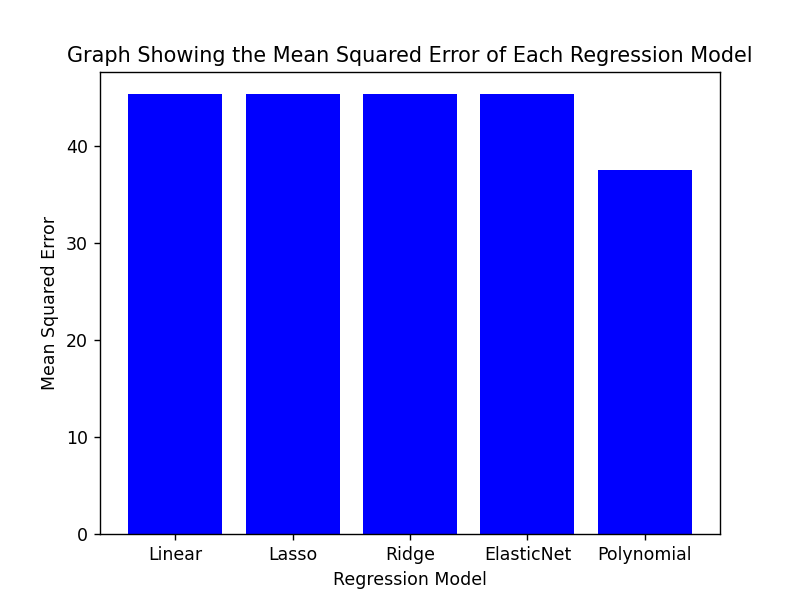

In [141]:
plt.figure()
plt.bar("Regression Model", "Mean Squared Error", data = model_evaluation_df, color = "b")
plt.xlabel("Regression Model")
plt.ylabel("Mean Squared Error")
plt.title("Graph Showing the Mean Squared Error of Each Regression Model")
plt.show()

In [142]:
import pickle
pickle.dump(coefficient, open("sea_level_predict_model_coefficient.pkl", "wb"))
pickle.dump(intercept, open("sea_level_predict_model_intercept.pkl", "wb"))`